In [1]:
# Import the Python Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
df_original = pd.read_csv("Student Depression Dataset.csv")

#  Display the first 5 rows of the data
print("First 5 rows of the dataset:")
display(df_original.head())

# Display dataset summary
print("Dataset info:")
df_original.info()

First 5 rows of the dataset:


id  Gender   Age           City Profession  Academic Pressure  \
0   2    Male  33.0  Visakhapatnam    Student                5.0   
1   8  Female  24.0      Bangalore    Student                2.0   
2  26    Male  31.0       Srinagar    Student                3.0   
3  30  Female  28.0       Varanasi    Student                3.0   
4  32  Female  25.0         Jaipur    Student                4.0   

   Work Pressure  CGPA  Study Satisfaction  Job Satisfaction  \
0            0.0  8.97                 2.0               0.0   
1            0.0  5.90                 5.0               0.0   
2            0.0  7.03                 5.0               0.0   
3            0.0  5.59                 2.0               0.0   
4            0.0  8.13                 3.0               0.0   

      Sleep Duration Dietary Habits   Degree  \
0          5-6 hours        Healthy  B.Pharm   
1          5-6 hours       Moderate      BSc   
2  Less than 5 hours        Healthy       BA   
3          7-8 hours       Moderate      BCA   
4          5-6 hours       Moderate   M.Tech   

  Have you ever had suicidal thoughts ?  Work/Study Hours  Financial Stress  \
0                                   Yes               3.0               1.0   
1                                    No               3.0               2.0   
2                                    No               9.0               1.0   
3                                   Yes               4.0               5.0   
4                                   Yes               1.0               1.0   

  Family History of Mental Illness  Depression  
0                               No           1  
1                              Yes           0  
2                              Yes           0  
3                              Yes           1  
4                               No           0

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  o

**Step 02- Outlier Removal**

Box Plots BEFORE Outlier Removal


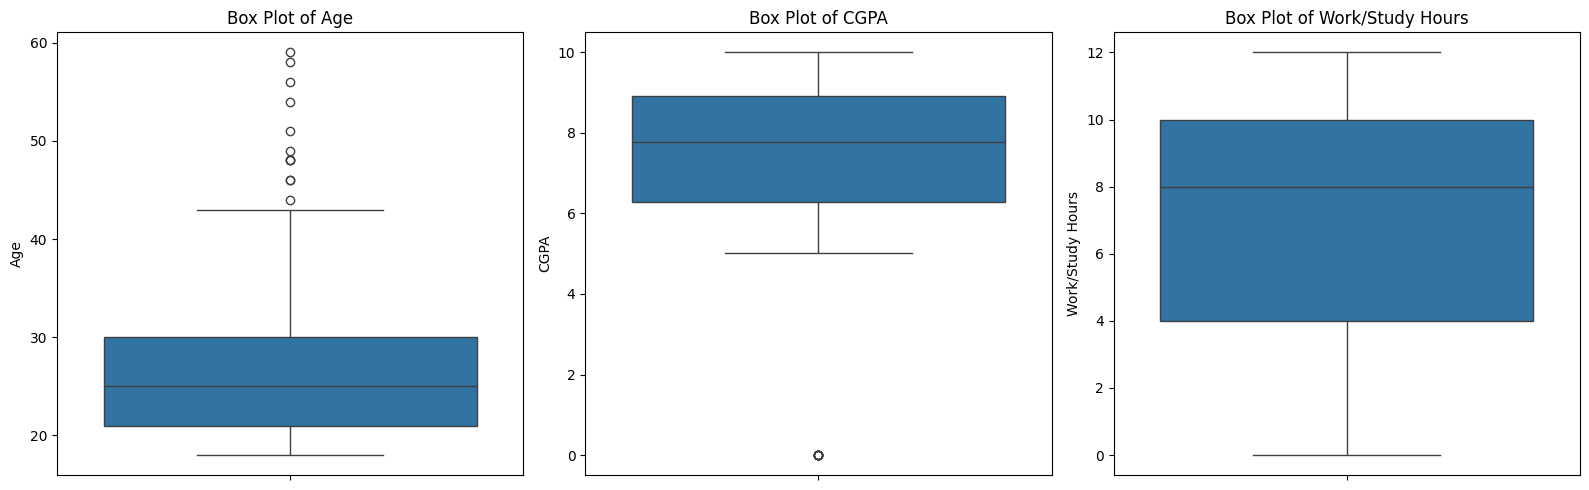

In [4]:
print("Box Plots BEFORE Outlier Removal")

# Set up the plot size
plt.figure(figsize=(16, 5))

# show plot for Age
plt.subplot(1, 3, 1) # (1 row, 3 columns, 1st plot)
sns.boxplot(y=df_original['Age'])
plt.title('Box Plot of Age')

# show plot for CGPA
plt.subplot(1, 3, 2)
sns.boxplot(y=df_original['CGPA'])
plt.title('Box Plot of CGPA')

# show plot for Work/Study Hours
plt.subplot(1, 3, 3)
sns.boxplot(y=df_original['Work/Study Hours'])
plt.title('Box Plot of Work/Study Hours')

# Prevent overlap
plt.tight_layout()
plt.show()

In [5]:
# Remove outliers from 'Age' using IQR method and check new dataset size
print("Removing Outliers from 'Age' and Visualizing the Result")
print(f"Original shape of the dataset: {df_original.shape}")

Q1 = df_original['Age'].quantile(0.25)
Q3 = df_original['Age'].quantile(0.75)

# Interquartile Range
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df_original[(df_original['Age'] >= lower_bound) & (df_original['Age'] <= upper_bound)]

print(f"New shape of the dataset after removing outliers: {df.shape}")

Removing Outliers from 'Age' and Visualizing the Result
Original shape of the dataset: (27901, 18)
New shape of the dataset after removing outliers: (27889, 18)


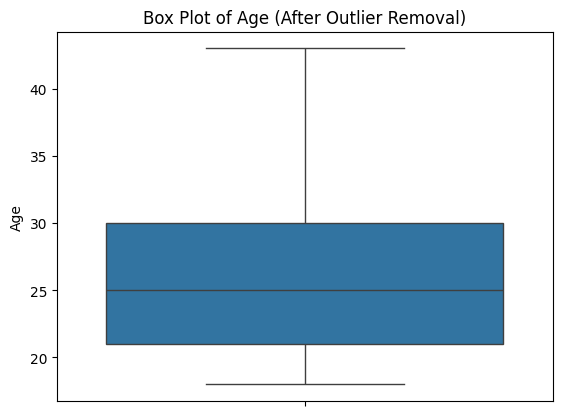

In [6]:
# Show boxplot of 'Age'
sns.boxplot(y=df['Age'])
plt.title('Box Plot of Age (After Outlier Removal)')
plt.show()

In [7]:
print("Cleaning the 'CGPA' column ")
print(f"Shape before removing CGPA outliers: {df.shape}")

# Calculate Q1, Q3, and IQR for CGPA
Q1_cgpa = df['CGPA'].quantile(0.25)
Q3_cgpa = df['CGPA'].quantile(0.75)
IQR_cgpa = Q3_cgpa - Q1_cgpa

lower_bound_cgpa = Q1_cgpa - 1.5 * IQR_cgpa
upper_bound_cgpa = Q3_cgpa + 1.5 * IQR_cgpa

df = df[(df['CGPA'] >= lower_bound_cgpa) & (df['CGPA'] <= upper_bound_cgpa)]

print(f"Shape after removing CGPA outliers: {df.shape}")

Cleaning the 'CGPA' column 
Shape before removing CGPA outliers: (27889, 18)
Shape after removing CGPA outliers: (27880, 18)


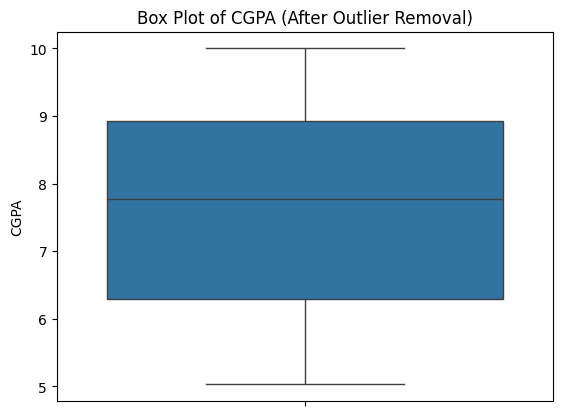

In [8]:
# Show boxplot of 'CGPA'
sns.boxplot(y=df['CGPA'])
plt.title('Box Plot of CGPA (After Outlier Removal)')
plt.show()